Lab1-ML-Evaluation
descrption: On-time data for all flights that departed NYC in 2013.



# Task1 

## setting up
First, let's import packages that will be used in our analysis and data preparation. We need NumPy to work with numerical data, pandas for data analysis and display, and plotly for visualization. Additionally, LabelEncoder to convert textual labels into numbers and StandadScaler for standardization.

Also, let's tell pandas to show us all the data in a dataset

Read flights.csv

In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, StandardScaler
from IPython.display import display
from IPython.display import display, Markdown

#pd.set_option('display.max_rows', 10000)

flights_df_init = pd.read_csv("flights.csv")
flights_df_init.shape
display(flights_df_init)


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T05:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T05:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T05:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T05:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T06:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30T14:00:00Z
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-09-30T22:00:00Z
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30T12:00:00Z
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30T11:00:00Z


## Remove interference data


In [3]:
# remove the row data which 'dep_time' is NAN
flights_df = flights_df_init.dropna(subset=['dep_time'])
display(flights_df)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T05:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T05:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T05:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T05:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T06:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336765,2013,9,30,2240.0,2245,-5.0,2334.0,2351,-17.0,B6,1816,N354JB,JFK,SYR,41.0,209,22,45,2013-09-30T22:00:00Z
336766,2013,9,30,2240.0,2250,-10.0,2347.0,7,-20.0,B6,2002,N281JB,JFK,BUF,52.0,301,22,50,2013-09-30T22:00:00Z
336767,2013,9,30,2241.0,2246,-5.0,2345.0,1,-16.0,B6,486,N346JB,JFK,ROC,47.0,264,22,46,2013-09-30T22:00:00Z
336768,2013,9,30,2307.0,2255,12.0,2359.0,2358,1.0,B6,718,N565JB,JFK,BOS,33.0,187,22,55,2013-09-30T22:00:00Z


## Exploratory data analysis

In [4]:
import sweetviz as sv 
flights_report = sv.analyze(flights_df)
flights_report.show_html()

:FEATURES DONE:                    |█████████████████████| [100%]   00:18  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:27  -> (00:00 left)


Creating Associations graph... DONE!
Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [40]:
visualizable_feature_names = flights_df.columns[1: -1] 
num_visualizable_features = len(visualizable_feature_names)

df = flights_df.sample(50)   #just for exec faster
fig_scatmat = go.Figure(data=go.Splom(
                        dimensions=[dict(label=feature, values=df[feature]) \
                                    for feature in visualizable_feature_names], \
                        marker=dict(color='red', showscale=False, line_color='blue', line_width=0.5)))

fig_scatmat.update_layout(title='Pairwise feature scatter plots', \
                  width=200 * num_visualizable_features, \
                  height=200 * num_visualizable_features)

fig_scatmat.show()

Visualize the Pairwise columns. 
Compared with go.Splom(), it has a much smaller notebook file size

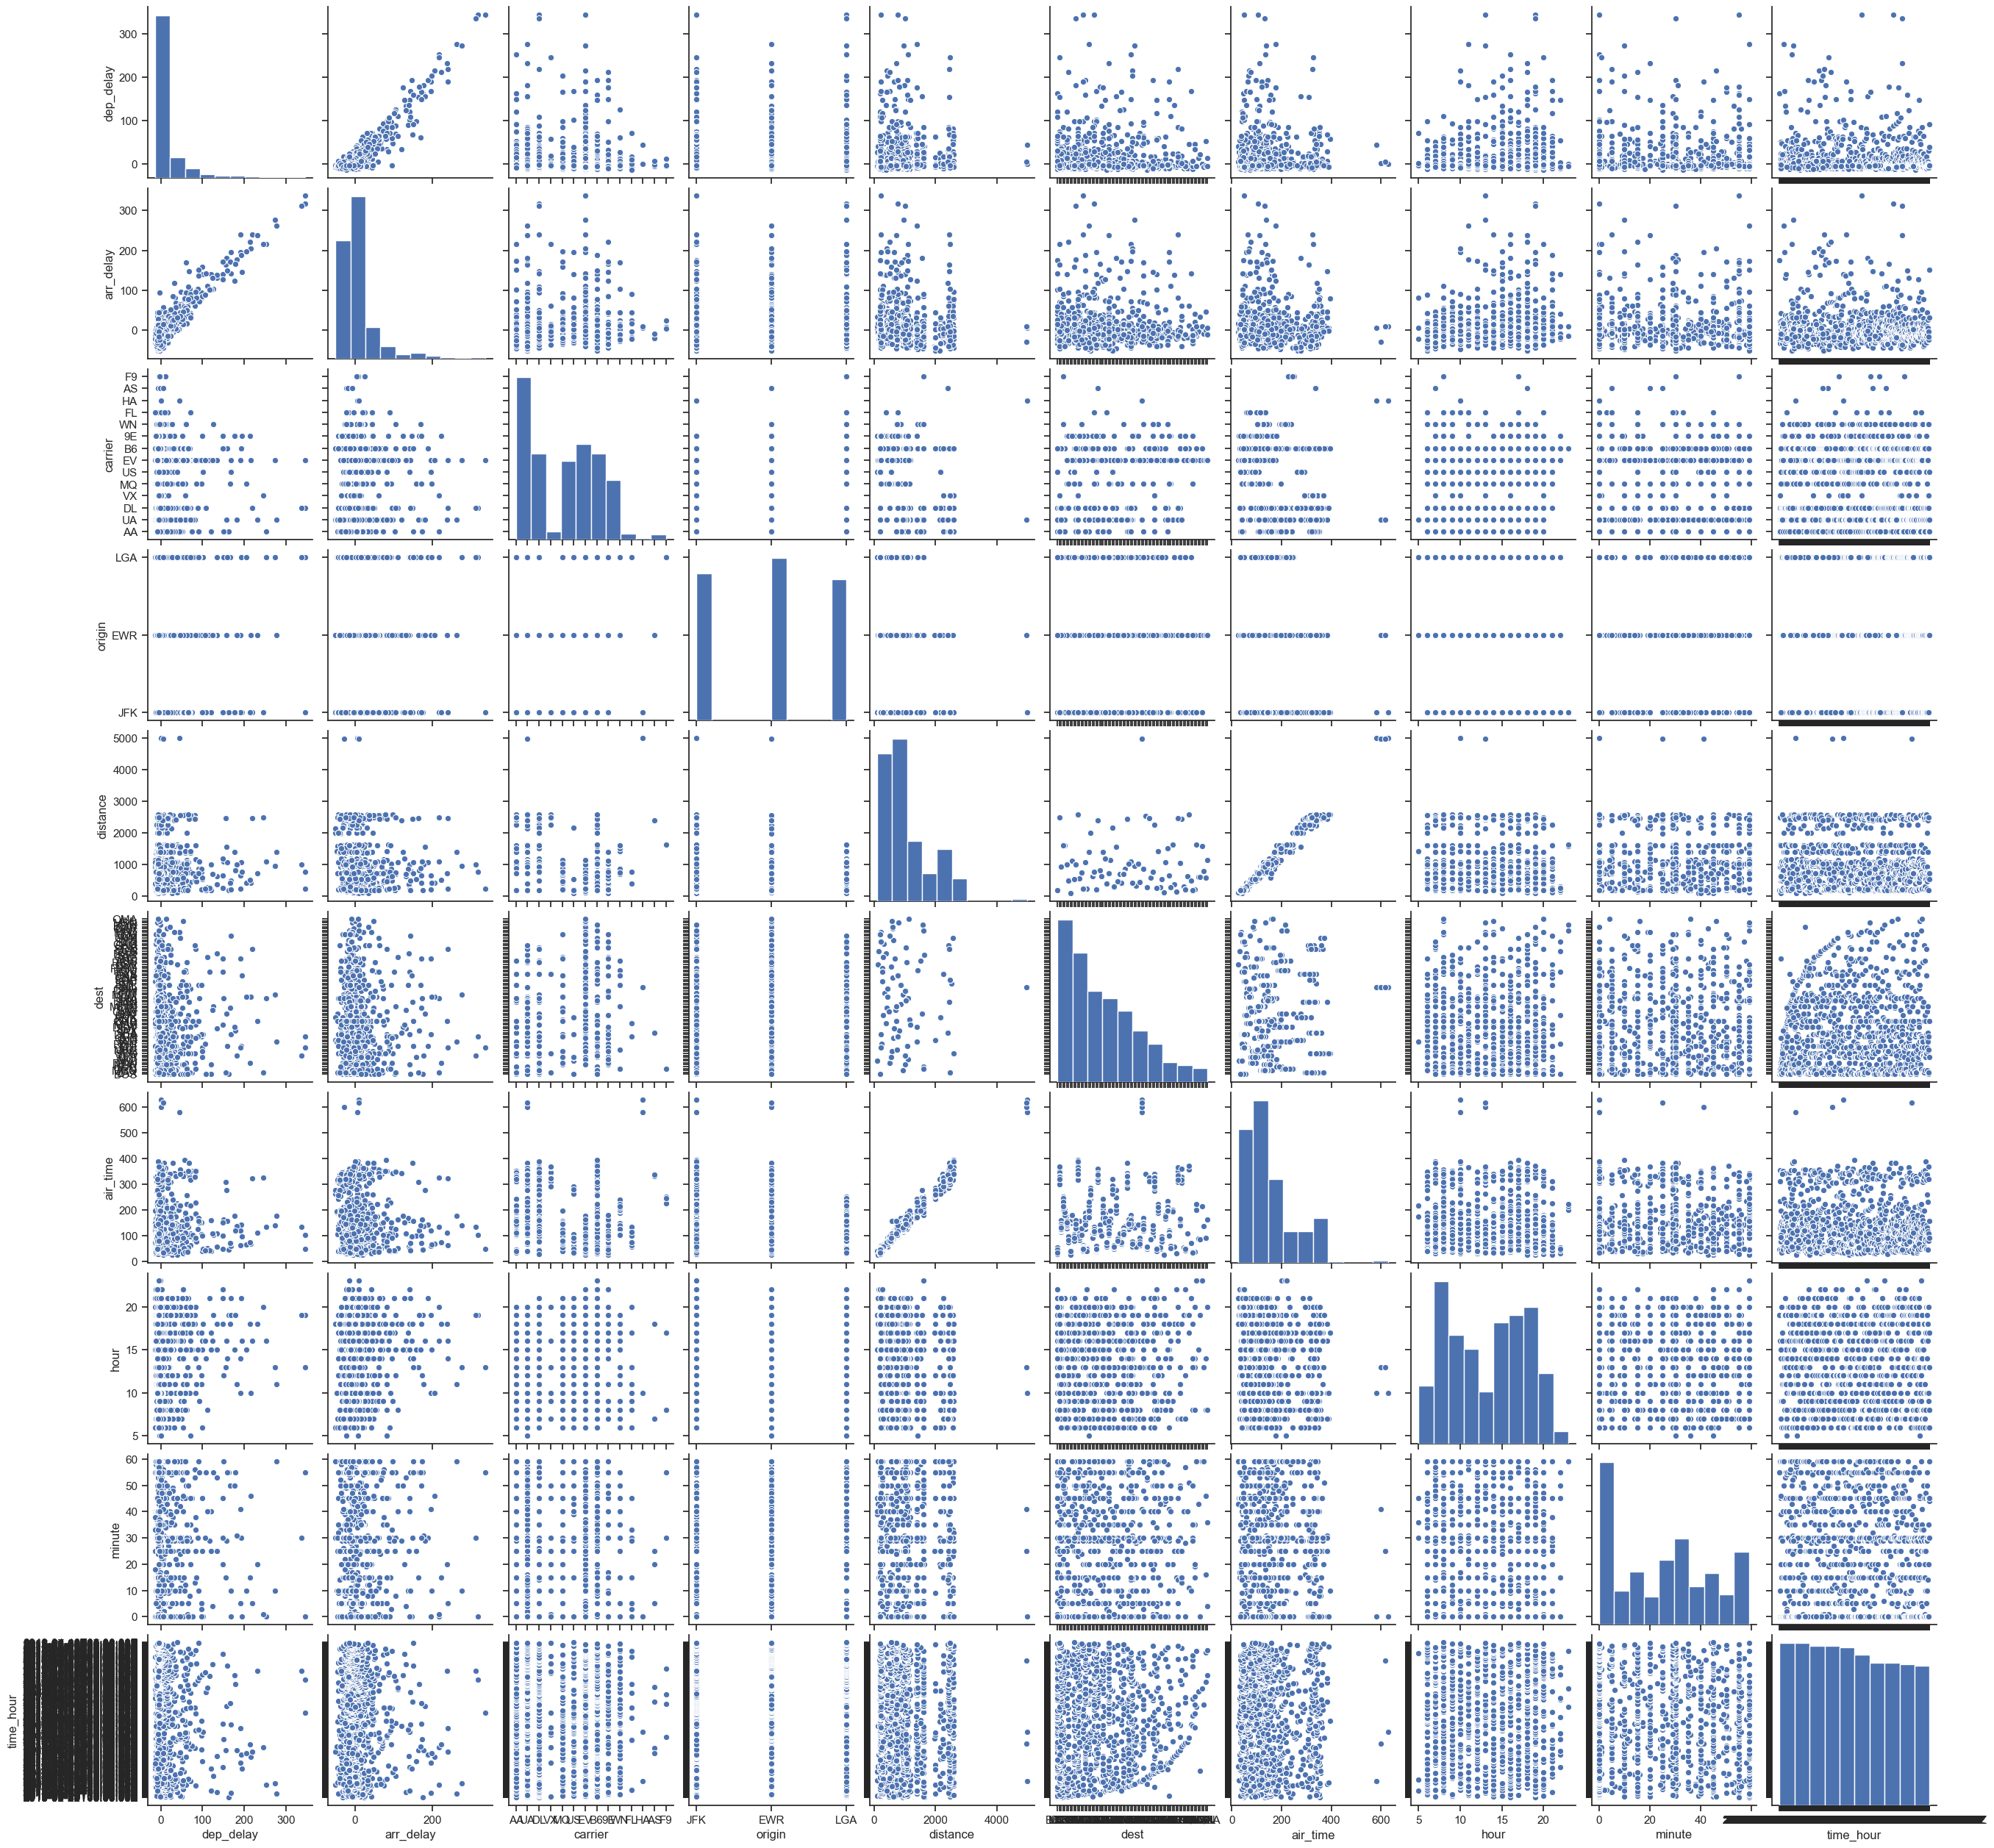

In [24]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.pairplot(flights_df.sample(1000), vars=['dep_delay','arr_delay','carrier','origin','distance','dest','air_time','hour','minute','time_hour'])

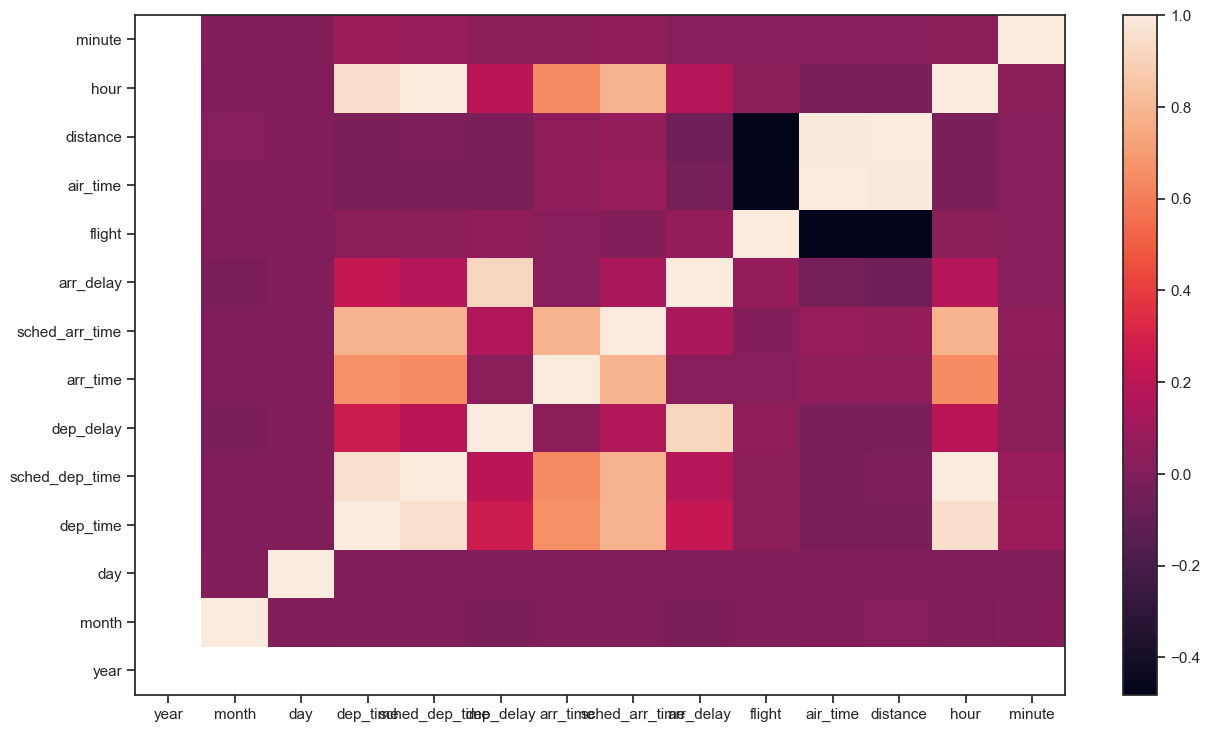

In [25]:
# Plot correlation matrix for columns in flights_df
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 9))
corr = flights_df.corr()
c = plt.pcolor(corr)
plt.yticks(np.arange(0.5, len(corr.index), 1), corr.index)
plt.xticks(np.arange(0.5, len(corr.columns), 1), corr.columns)
fig.colorbar(c)

# Task2 Create at least 5 different views (reports) to the team using the imported dataset.


## 2.1 Demonstrate the percentage of delay and not delay, and the relation between departure delay and arrival delay.

About 51.5% flights delayed, 48.5% flights arrival on time.
About 70% arrival delay caused by the departure delay.
About 38.4% departure delay flight was sloved in the flight

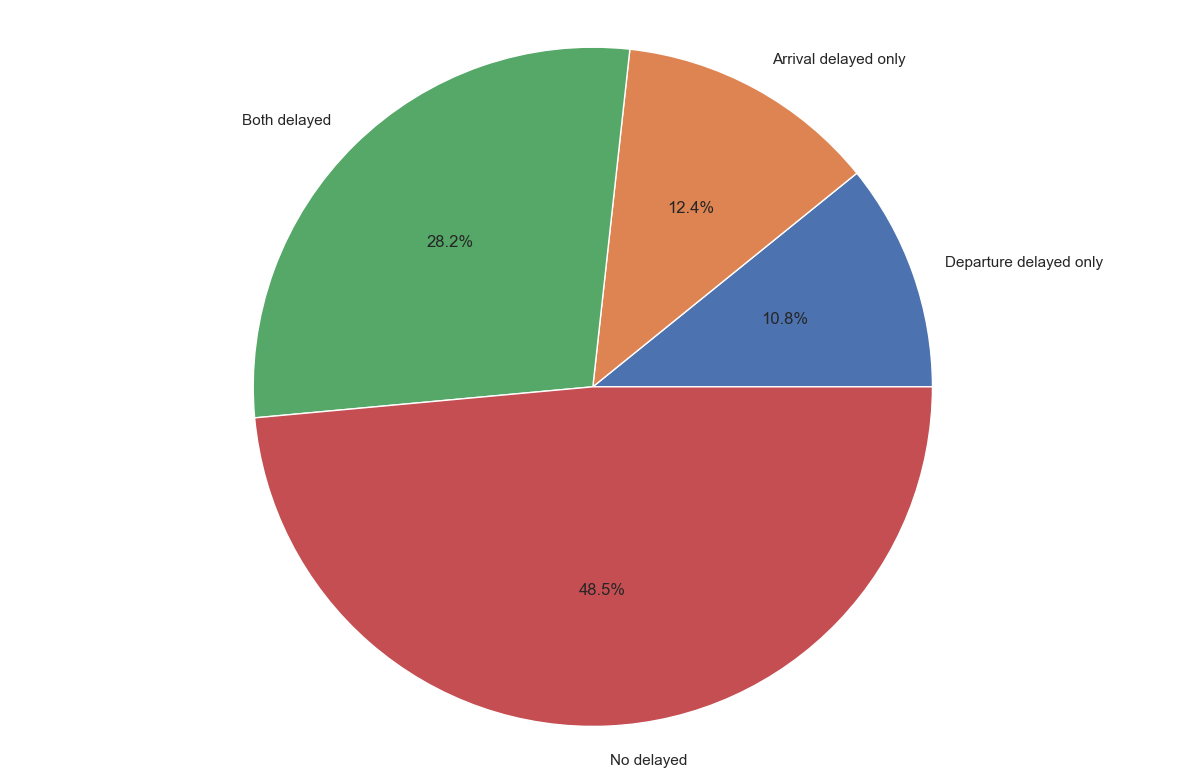

,Name,Count,Percentage
0,Departure delayed only,35442,0.108271
1,Arrival delayed only,40701,0.124336
2,Both delayed,92303,0.281974
3,No delayed,158900,0.485419


delayed flight percentage: 0.514580902164682
arr_delay_causedby_dep_delay percentage: 0.6939866470181348
departer delay but sloved in flight percentage: 0.38397451870470084


In [26]:
df=flights_df.loc[:,['dep_delay','arr_delay']]
df=df.dropna()
total_count = len(df)
no_delay_count = len(df.loc[ (df['dep_delay']<=0) & (df['arr_delay']<=0) ])  
arr_delay_only_count = len(df.loc[ (df['dep_delay']<=0) & (df['arr_delay']>0) ]) 
dep_delay_only_count = len(df.loc[ (df['dep_delay']>0) & (df['arr_delay']<=0) ])  
both_dep_arr_delay_count = len(df.loc[ (df['dep_delay']>0) & (df['arr_delay']>0) ])  

df = pd.DataFrame({
    'Name' : ['Departure delayed only','Arrival delayed only','Both delayed','No delayed'],
    "Count" : [dep_delay_only_count,arr_delay_only_count,both_dep_arr_delay_count,no_delay_count],
    "Percentage" : [dep_delay_only_count/total_count,arr_delay_only_count/total_count,both_dep_arr_delay_count/total_count,no_delay_count/total_count],
})
import matplotlib.pyplot as plt
plt.pie(df['Count'], labels=df['Name'], autopct='%1.1f%%')
plt.axis('equal')
plt.show()
display(df)


delay_count = arr_delay_only_count +  dep_delay_only_count + both_dep_arr_delay_count;
delay_count_percentage = delay_count/total_count
relateto_dep_delay_percentage = both_dep_arr_delay_count/(both_dep_arr_delay_count+arr_delay_only_count)
dep_delay_to_both_delay = dep_delay_only_count/both_dep_arr_delay_count

print("delayed flight percentage: {}".format(delay_count_percentage))
print("arr_delay_causedby_dep_delay percentage: {}".format(relateto_dep_delay_percentage))
print("departer delay but sloved in flight percentage: {}".format(dep_delay_to_both_delay))


## 2.2 Demonstrate the relation between flight route and arrival delayed time. It shows the flight distance has no obviously relation to arrival delayed time. Routes with short distance are alittle bit more possible to delay.

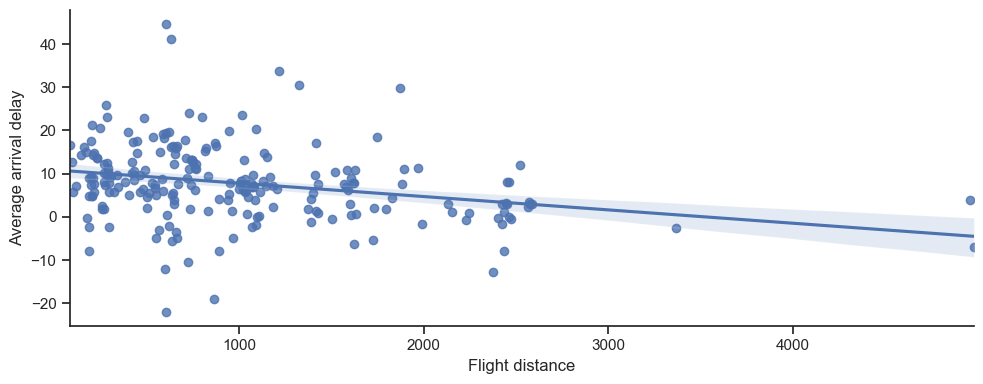

distance  arr_delay
origin dest                     
EWR    ALB      143.0  14.397129
       ANC     3370.0  -2.500000
       ATL      746.0  13.233183
       AUS     1504.0  -0.474399
       AVL      583.0   8.804781
...               ...        ...
LGA    SYR      198.0   9.252788
       TPA     1010.0   8.206491
       TVC      655.0  15.972603
       TYS      647.0   3.894340
       XNA     1147.0   7.114245

[223 rows x 2 columns]

In [27]:
import seaborn as seab
df= flights_df.loc[:,['origin','dest','distance','arr_delay']].dropna()
tt = df.groupby(['origin','dest']).mean()

seab.set_context({"figure.figsize":(15,10)})
ax = seab.lmplot(data=tt, x="distance", y='arr_delay',height=4,
    aspect=2.5)
ax.set(xlabel='Flight distance', ylabel='Average arrival delay')
plt.show()
display(tt)

## 2.3 Demonstrate the arrival delay percentage in different hours.  low delay percentage in morning time

In [28]:
def drawchart(dataset, group, value_col, labels = ["No delayed", "Arrival delayed"], sort = True , fsize = 10):
    df=dataset.loc[:,[group,value_col]].dropna()
    df_delayed = df.loc[df[value_col]>0]
    tt = df.groupby([group]).count()
    t1 = df_delayed.groupby([group]).count()
    t1['total']=tt[value_col]
    t1['no_delay']=t1['total']-t1[value_col]
    t1['percentage']=t1[value_col]/t1['total']
    if sort==True:
        t1=t1.sort_values('percentage',ascending=False)

    fig, ax = plt.subplots(figsize=(fsize,fsize/3*2))
    t1[['no_delay',value_col]].plot(kind='bar', stacked=True, ax=ax)
    ax.legend(labels);
    for i, label in enumerate(list(t1.index)):
        score = t1.loc[label]['percentage']
        h=t1.loc[label]['total']
        ax.annotate(f'{score:.1%}', (i - 0.2, h+1000))
    plt.show()
    display(t1)

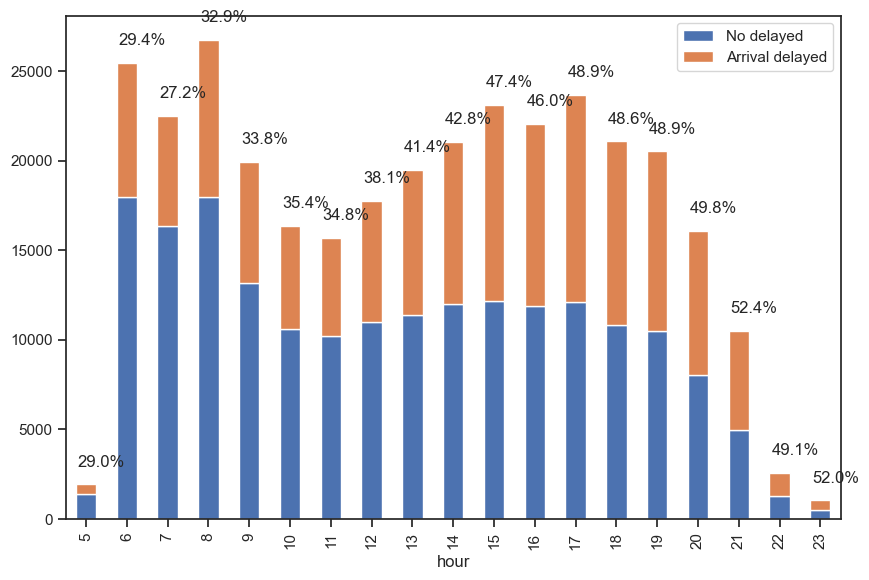

,arr_delay,total,no_delay,percentage
hour,,,,
5,563,1940,1377,0.290206
6,7484,25447,17963,0.294101
7,6113,22475,16362,0.271991
8,8797,26734,17937,0.329057
9,6745,19931,13186,0.338418
10,5794,16370,10576,0.353940
11,5467,15689,10222,0.348461
12,6759,17744,10985,0.380917
13,8050,19457,11407,0.413733


In [29]:

drawchart(flights_df, 'hour','arr_delay', sort=False)

## 2.4 Demonstrate the dep_delay percentage between different airport. 

Airport LGA is better than JFK and EWR on delay percentage, it maybe relate to management and situation of the airport

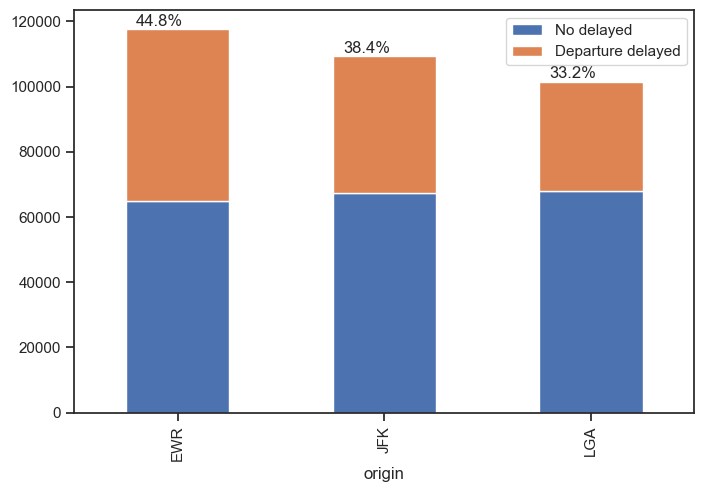

,dep_delay,total,no_delay,percentage
origin,,,,
EWR,52711,117596,64885,0.448238
JFK,42031,109416,67385,0.384139
LGA,33690,101509,67819,0.331892


In [30]:

drawchart(flights_df, 'origin','dep_delay', sort=False,labels = ["No delayed", "Departure delayed"],fsize = 8 )

## 2.5 Demonstrate the arr_delay percentage between different company.

US and AA these two company have lower delay percentage, WN and UA have high delay percentage,  It shows the delay maybe relate to management

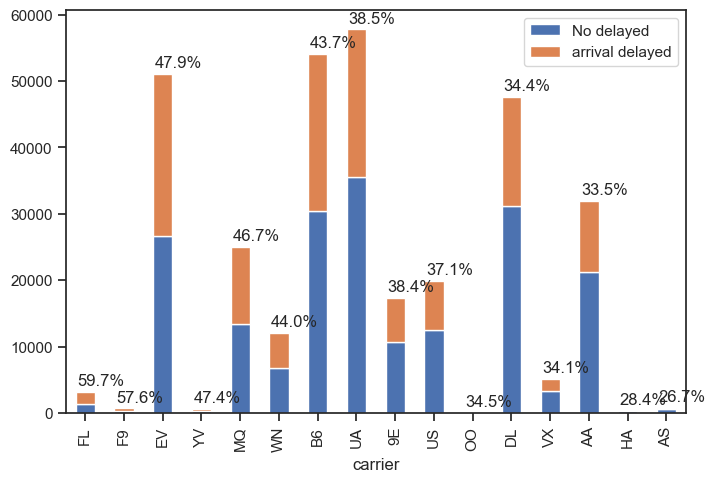

,arr_delay,total,no_delay,percentage
carrier,,,,
FL,1895,3175,1280,0.596850
F9,392,681,289,0.575624
EV,24484,51108,26624,0.479064
YV,258,544,286,0.474265
MQ,11693,25037,13344,0.467029
WN,5304,12044,6740,0.440385
B6,23609,54049,30440,0.436807
UA,22222,57782,35560,0.384583
9E,6637,17294,10657,0.383775


In [31]:
drawchart(flights_df, 'carrier','arr_delay', sort=True ,labels = ["No delayed", "arrival delayed"],fsize = 8 )

# Task3
Create a new dataset named (pop_data) with flight data from airlines UA (United Airlines) and DL (Delta Airlines).

In [32]:
def select_data(dataset, company):
    df = dataset.loc[ (dataset['arr_delay']>0) & (dataset['carrier']==company) , ['carrier','arr_delay'] ]
    if len(df)>20000:
        df = df.sample(20000) 
    return df

ua = select_data(flights_df, 'UA')
dl = select_data(flights_df, 'DL')
pop_data=pd.concat([ua,dl]).reset_index(drop=True)
display(pop_data)

,carrier,arr_delay
0,UA,26.0
1,UA,17.0
2,UA,49.0
3,UA,11.0
4,UA,1.0
...,...,...
36408,DL,3.0
36409,DL,68.0
36410,DL,10.0
36411,DL,1.0


# Task4
Create two new datasets (“dl” and “ua”) of 1000 observations each from the “pop_data” dataset

In [33]:
ua = pop_data.loc[pop_data['carrier']=='UA'].sample(1000).reset_index(drop=True)
ua['sample_id'] = 1
display(Markdown("Dataset UA:"),ua)
display(ua)
dl = pop_data.loc[pop_data['carrier']=='DL'].sample(1000).reset_index(drop=True)
dl['sample_id'] = 2
display(Markdown("Dataset DL:"),dl)
display(dl)

Dataset UA:

,carrier,arr_delay,sample_id
0,UA,3.0,1
1,UA,24.0,1
2,UA,11.0,1
3,UA,7.0,1
4,UA,13.0,1
...,...,...,...
995,UA,28.0,1
996,UA,37.0,1
997,UA,3.0,1
998,UA,1.0,1


,carrier,arr_delay,sample_id
0,UA,3.0,1
1,UA,24.0,1
2,UA,11.0,1
3,UA,7.0,1
4,UA,13.0,1
...,...,...,...
995,UA,28.0,1
996,UA,37.0,1
997,UA,3.0,1
998,UA,1.0,1


Dataset DL:

,carrier,arr_delay,sample_id
0,DL,90.0,2
1,DL,9.0,2
2,DL,1.0,2
3,DL,9.0,2
4,DL,1.0,2
...,...,...,...
995,DL,39.0,2
996,DL,8.0,2
997,DL,11.0,2
998,DL,2.0,2


,carrier,arr_delay,sample_id
0,DL,90.0,2
1,DL,9.0,2
2,DL,1.0,2
3,DL,9.0,2
4,DL,1.0,2
...,...,...,...
995,DL,39.0,2
996,DL,8.0,2
997,DL,11.0,2
998,DL,2.0,2


# Task5
Create a new dataset (samples) containing the data of the 2 samples created in the previous item

In [34]:
samples = pd.concat([ua,dl]).reset_index(drop=True)
display(samples)

,carrier,arr_delay,sample_id
0,UA,3.0,1
1,UA,24.0,1
2,UA,11.0,1
3,UA,7.0,1
4,UA,13.0,1
...,...,...,...
1995,DL,39.0,2
1996,DL,8.0,2
1997,DL,11.0,2
1998,DL,2.0,2


# Task6
For each sample (“dl” and “ua”) calculate standard error  and the mean 

In [35]:
#mean
dl_mean = dl['arr_delay'].mean()
ua_mean = ua['arr_delay'].mean()

#stander error
dl_se = dl['arr_delay'].sem()
ua_se = ua['arr_delay'].sem()

print(f'standard error:   DL:{dl_se:.2f}   UA:{ua_se:.2f}')
print(f'mean:             DL:{dl_mean:.2f}  UA:{ua_mean:.2f}')

standard error:   DL:1.65   UA:1.53
mean:             DL:34.85  UA:37.66


# Task 7
For each mean calculated before we need to define the “confidence intervals” in this case 95% confidence interval.
Display :
LowerValue “UA” - MeanValeu “UA” - UpperValues “UA”
LowerValue “DA” - MeanValue “DA” - UpperValues “DA”

In [36]:
import scipy.stats

def mean_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return  [m-h, m, m+h]

display('UA: ' +  ' - '.join([f'{i:.3f}' for i in mean_interval(ua['arr_delay'])]))
display('DL: ' +  ' - '.join([f'{i:.3f}' for i in mean_interval(dl['arr_delay'])]))

'UA: 34.651 - 37.662 - 40.673'

'DL: 31.621 - 34.854 - 38.087'

# Task 8
After these set of previous calculations it was requested that you take the T-TEST concept and apply it on your 2 groups of data (“means”) to let your team knows if Delta Airlines (DL) flights are delayed more than United Airlines (UA) flights ?

In [37]:
from scipy.stats import ttest_ind_from_stats
mean1 = ua['arr_delay'].mean()
mean2 = dl['arr_delay'].mean()
std1 = ua['arr_delay'].std()
std2 = dl['arr_delay'].std()
nobs1 = len(ua['arr_delay'])
nobs2 = len(dl['arr_delay'])

modified_std1 = np.sqrt(np.float32(nobs1)/np.float32(nobs1-1)) * std1
modified_std2 = np.sqrt(np.float32(nobs2)/np.float32(nobs2-1)) * std2


(statistic, pvalue) = ttest_ind_from_stats(mean1=mean1, std1=std1, nobs1=nobs1, mean2=mean2, std2=std2, nobs2=nobs2)
print("T-statistic: ", statistic)
print ("P-value: ", pvalue)

if pvalue>0.05:
    print ("UA and DL may have same average delay time.")
else:
    if mean1>mean2:
        print ("UA flights are delayed more than DL flights.")
    else:   
        print ("DL flights are delayed more than UA flights.")

T-statistic:  1.2473171517933113
P-value:  0.2124274123600233
UA and DL may have same average delay time.
